In [1]:
import os, sys
sys.path.insert(0, "../../shared_sources")
import matplotlib.pyplot as plt
import numpy as np
import librosa
import pickle
import torch
import models
import IPython
import librosa.display
import warnings
import soundfile
from stft import CalcMel

warnings.filterwarnings('ignore')

# initialize methods to play samples

In [13]:
scaler = pickle.load(open("../../shared_sources/fitted_maxabsscalerx80.sav", 'rb'))
calc_mel = CalcMel(scaler,(1,80,80))  

def create_wave_and_mel(data_path, sampling_rate=22050, offset=0):
    audio,_ = librosa.load(data_path, sr=sampling_rate, duration=0.92, offset=offset)
    t = torch.Tensor(audio).unsqueeze(0)
    mel = np.reshape(calc_mel.mel_spectrogram(t,False), (80,80))
    return audio, mel

    
def play_audio(audio):
    IPython.display.display(IPython.display.Audio(audio, rate=22050))
    
def plot_mel(mel):
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mel, sr=22050,
                             fmax=22050/2, ax=ax)
    fig.show()
    


# play and display saved examples

generated20.wav


<IPython.core.display.Javascript object>


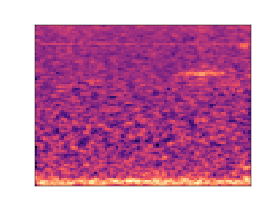

generated11.wav


<IPython.core.display.Javascript object>


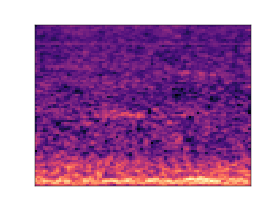

generated24.wav


<IPython.core.display.Javascript object>


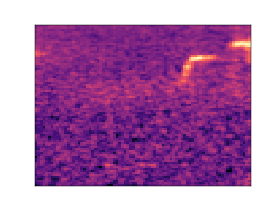

generated7.wav


<IPython.core.display.Javascript object>


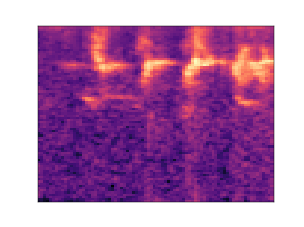

generated8.wav


<IPython.core.display.Javascript object>


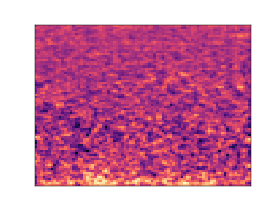

generated5.wav


<IPython.core.display.Javascript object>


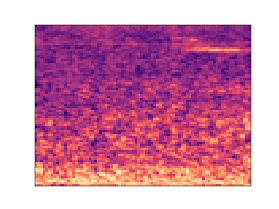

generated12.wav


<IPython.core.display.Javascript object>


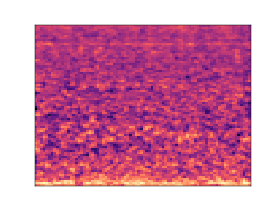

generated0.wav


<IPython.core.display.Javascript object>


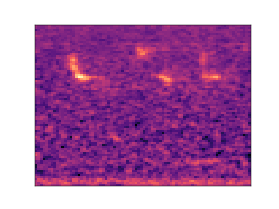

generated21.wav


<IPython.core.display.Javascript object>


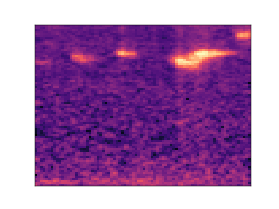

generated22.wav


<IPython.core.display.Javascript object>


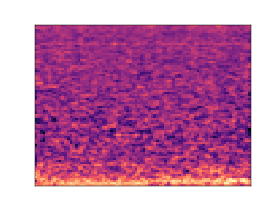

generated1.wav


<IPython.core.display.Javascript object>


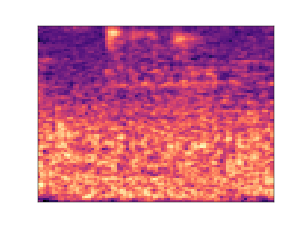

generated4.wav


<IPython.core.display.Javascript object>


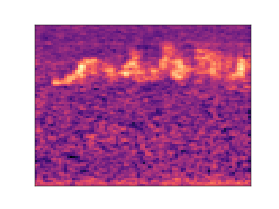

generated13.wav


<IPython.core.display.Javascript object>


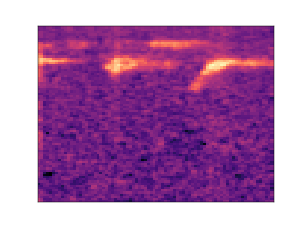

generated17.wav


<IPython.core.display.Javascript object>


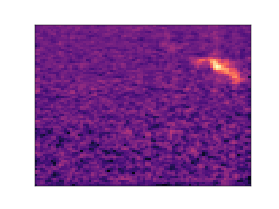

generated15.wav


<IPython.core.display.Javascript object>


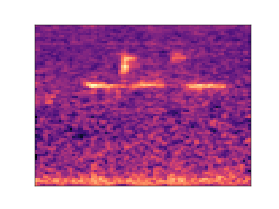

generated14.wav


<IPython.core.display.Javascript object>


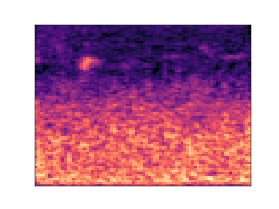

generated9.wav


<IPython.core.display.Javascript object>


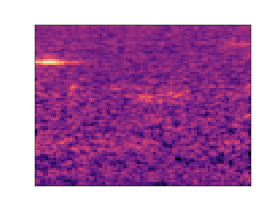

generated23.wav


<IPython.core.display.Javascript object>


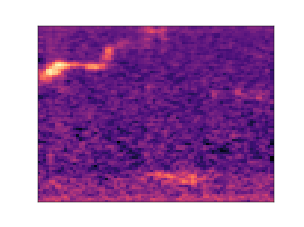

generated2.wav


<IPython.core.display.Javascript object>


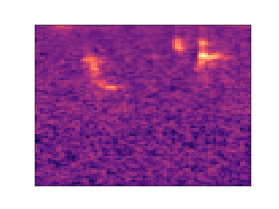

generated18.wav


<IPython.core.display.Javascript object>


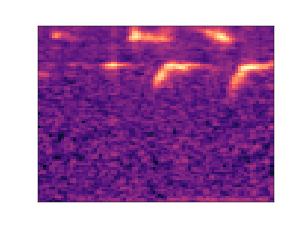

generated6.wav


<IPython.core.display.Javascript object>


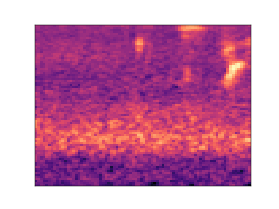

generated10.wav


<IPython.core.display.Javascript object>


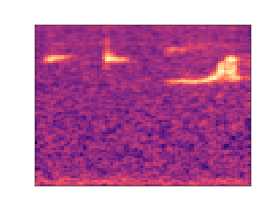

generated16.wav


<IPython.core.display.Javascript object>


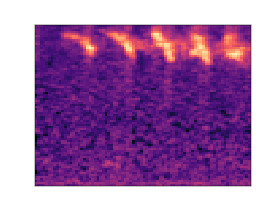

generated19.wav


<IPython.core.display.Javascript object>


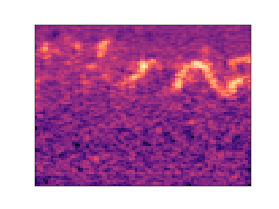

generated3.wav


<IPython.core.display.Javascript object>


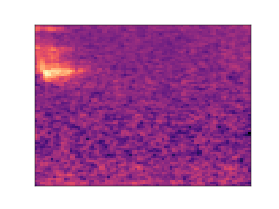

In [19]:
%matplotlib notebook
plt.rcParams['figure.dpi'] = 40
folder_path = "examples/"
for file_name in os.listdir(folder_path):
    if file_name.endswith(".wav"):
        print(file_name)
        audio, mel = create_wave_and_mel(folder_path + file_name)
        play_audio(audio)
        plot_mel(mel)




# Initialize waveglow, wgan-modell, scaler and functionality to  generte new data

In [20]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to(device)

gen = torch.load("gen-5-21373.torch").to(device)


    
def create_samples(num_samples = 25):
    noise = torch.randn(num_samples, 100, 1, 1).to(device)
    ret_mels = np.zeros((num_samples,80,80))
    ret_audio = []
    with torch.no_grad():
        pred = gen(noise).cpu().numpy()
        for i in range(num_samples):
            mel = np.reshape(pred[i],(80,80))
            mel = scaler.inverse_transform(mel)
            ret_mels[i] = mel
            mel = torch.Tensor(mel).unsqueeze(0)
            audio = waveglow.infer(mel.to(device))
            ret_audio.append(audio)
    return ret_mels, ret_audio

def save_audio_to_file(audio, filename):
    soundfile.write("examples/" + filename, audio, 22050)
    


    


Using cache found in /home/fabi/.cache/torch/hub/nvidia_DeepLearningExamples_torchhub


# generate new examples

<IPython.core.display.Javascript object>


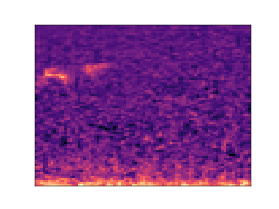

<IPython.core.display.Javascript object>


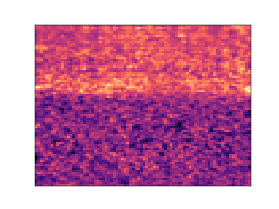

<IPython.core.display.Javascript object>


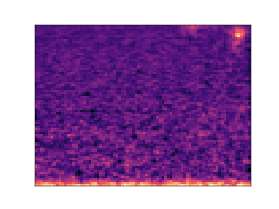

<IPython.core.display.Javascript object>


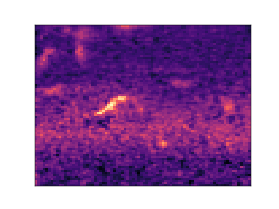

<IPython.core.display.Javascript object>


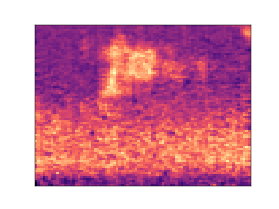

<IPython.core.display.Javascript object>


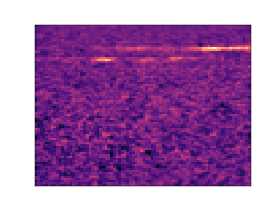

<IPython.core.display.Javascript object>


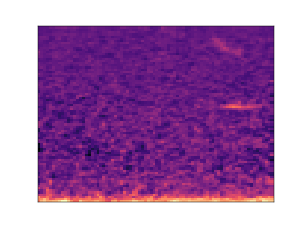

<IPython.core.display.Javascript object>


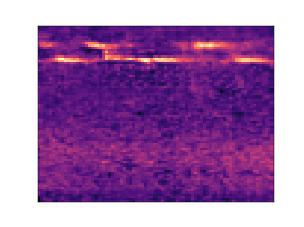

<IPython.core.display.Javascript object>


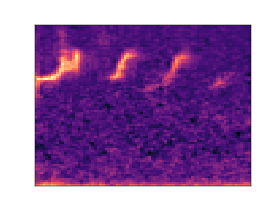

<IPython.core.display.Javascript object>


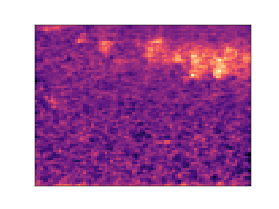

<IPython.core.display.Javascript object>


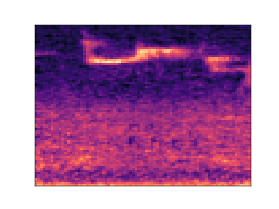

<IPython.core.display.Javascript object>


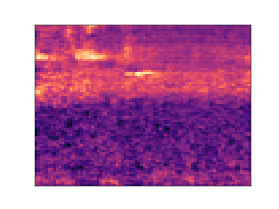

<IPython.core.display.Javascript object>


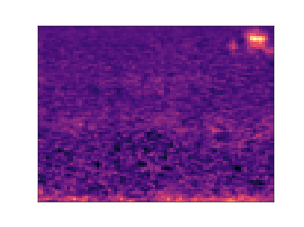

<IPython.core.display.Javascript object>


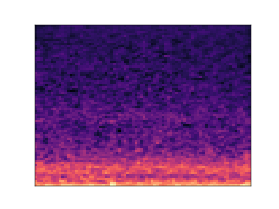

<IPython.core.display.Javascript object>


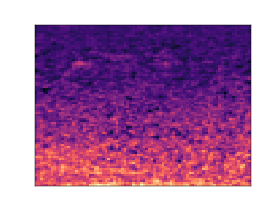

<IPython.core.display.Javascript object>


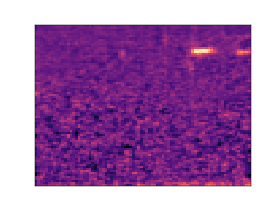

<IPython.core.display.Javascript object>


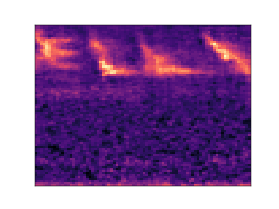

<IPython.core.display.Javascript object>


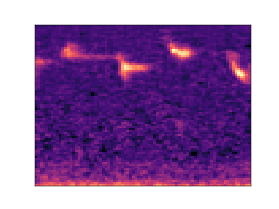

<IPython.core.display.Javascript object>


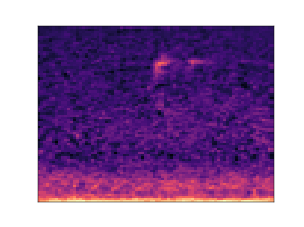

<IPython.core.display.Javascript object>


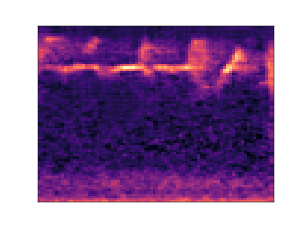

<IPython.core.display.Javascript object>


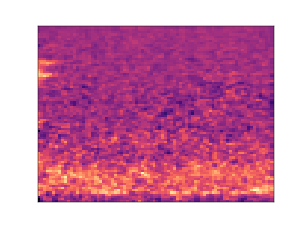

<IPython.core.display.Javascript object>


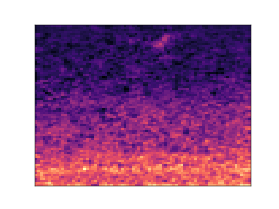

<IPython.core.display.Javascript object>


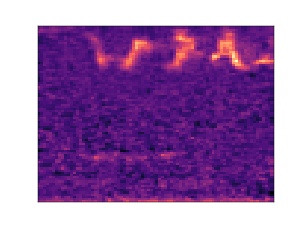

<IPython.core.display.Javascript object>


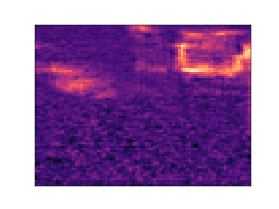

<IPython.core.display.Javascript object>


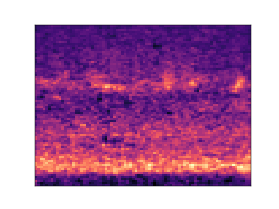

In [21]:
%matplotlib notebook
plt.rcParams['figure.dpi'] = 40
samples = 25
mels, audios = create_samples(samples)

for i in range(samples):
    audio = audios[i].cpu().numpy()[0]
    play_audio(audio)
    plot_mel(mels[i])